# Work
試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
請嘗試將 BN 放在 Activation 之前，並比較訓練結果
請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
#Batch_size = 在 16時,泛化能力最高 精確率達0.5413

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
# Define results
results = {}
for batchSize in BATCH_SIZE :
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 226s 5ms/step - loss: 2.2515 - accuracy: 0.1614 - val_loss: 1068.2969 - val_accuracy: 0.2123
Epoch 46/50
50000/50000 [==============================] - 214s 4ms/step - loss: 2.2492 - accuracy: 0.1624 - val_loss: 2834.9460 - val_accuracy: 0.1909
Epoch 47/50
50000/50000 [==============================] - 219s 4ms/step - loss: 2.2521 - accuracy: 0.1645 - val_loss: 2.9054 - val_accuracy: 0.1871
Epoch 48/50
50000/50000 [==============================] - 217s 4ms/step - loss: 2.2503 - accuracy: 0.1678 - val_loss: 3.4467 - val_accuracy: 0.2254
Epoch 49/50
50000/50000 [==============================] - 216s 4ms/step - loss: 2.2417 - accuracy: 0.1670 - val_loss: 3.0931 - val_accuracy: 0.1902
Epoch 50/50
50000/50000 [==============================] - 217s 4ms/step - loss: 2.2454 - accuracy: 0.1617 - val_loss: 2.8659 - val_accuracy: 0.1873
Model: "model_2"
_________________________________________________________________
Layer (type)                 

Epoch 40/50
50000/50000 [==============================] - 44s 872us/step - loss: 1.1667 - accuracy: 0.5857 - val_loss: 1.3811 - val_accuracy: 0.5192
Epoch 41/50
50000/50000 [==============================] - 44s 870us/step - loss: 1.1611 - accuracy: 0.5881 - val_loss: 1.4093 - val_accuracy: 0.5005
Epoch 42/50
50000/50000 [==============================] - 44s 872us/step - loss: 1.1558 - accuracy: 0.5895 - val_loss: 1.3114 - val_accuracy: 0.5413
Epoch 43/50
50000/50000 [==============================] - 44s 870us/step - loss: 1.1505 - accuracy: 0.5912 - val_loss: 1.3234 - val_accuracy: 0.5372
Epoch 44/50
50000/50000 [==============================] - 44s 885us/step - loss: 1.1377 - accuracy: 0.5977 - val_loss: 1.3820 - val_accuracy: 0.5137
Epoch 45/50
50000/50000 [==============================] - 44s 875us/step - loss: 1.1407 - accuracy: 0.5954 - val_loss: 1.3493 - val_accuracy: 0.5277
Epoch 46/50
50000/50000 [==============================] - 44s 873us/step - loss: 1.1354 - accuracy:

50000/50000 [==============================] - 28s 553us/step - loss: 0.9292 - accuracy: 0.6691 - val_loss: 1.4453 - val_accuracy: 0.5208
Epoch 35/50
50000/50000 [==============================] - 28s 566us/step - loss: 0.9184 - accuracy: 0.6742 - val_loss: 1.5003 - val_accuracy: 0.5056
Epoch 36/50
50000/50000 [==============================] - 28s 555us/step - loss: 0.9081 - accuracy: 0.6753 - val_loss: 1.5620 - val_accuracy: 0.4907
Epoch 37/50
50000/50000 [==============================] - 27s 546us/step - loss: 0.9002 - accuracy: 0.6787 - val_loss: 1.5403 - val_accuracy: 0.5015
Epoch 38/50
50000/50000 [==============================] - 28s 558us/step - loss: 0.8934 - accuracy: 0.6803 - val_loss: 1.4547 - val_accuracy: 0.5224
Epoch 39/50
50000/50000 [==============================] - 26s 512us/step - loss: 0.8860 - accuracy: 0.6844 - val_loss: 1.4984 - val_accuracy: 0.5079
Epoch 40/50
50000/50000 [==============================] - 26s 519us/step - loss: 0.8722 - accuracy: 0.6885 - va

Epoch 29/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5489 - accuracy: 0.8103 - val_loss: 1.9170 - val_accuracy: 0.4656
Epoch 30/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5299 - accuracy: 0.8163 - val_loss: 1.9340 - val_accuracy: 0.4613
Epoch 31/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.5060 - accuracy: 0.8226 - val_loss: 2.0085 - val_accuracy: 0.4543
Epoch 32/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.4949 - accuracy: 0.8286 - val_loss: 2.2181 - val_accuracy: 0.4327
Epoch 33/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.4792 - accuracy: 0.8348 - val_loss: 2.0693 - val_accuracy: 0.4679
Epoch 34/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.4578 - accuracy: 0.8440 - val_loss: 2.1192 - val_accuracy: 0.4693
Epoch 35/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.4353 - accuracy:

50000/50000 [==============================] - 7s 131us/step - loss: 0.6302 - accuracy: 0.7897 - val_loss: 1.7375 - val_accuracy: 0.4765
Epoch 25/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.6059 - accuracy: 0.7995 - val_loss: 1.8626 - val_accuracy: 0.4605
Epoch 26/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.5801 - accuracy: 0.8079 - val_loss: 1.7868 - val_accuracy: 0.4744
Epoch 27/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.5564 - accuracy: 0.8163 - val_loss: 1.9359 - val_accuracy: 0.4506
Epoch 28/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.5307 - accuracy: 0.8246 - val_loss: 1.7988 - val_accuracy: 0.4794
Epoch 29/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.4990 - accuracy: 0.8392 - val_loss: 1.9242 - val_accuracy: 0.4549
Epoch 30/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.4771 - accuracy: 0.8458 - val_loss:

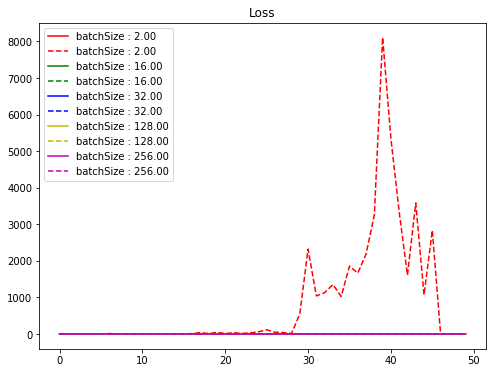

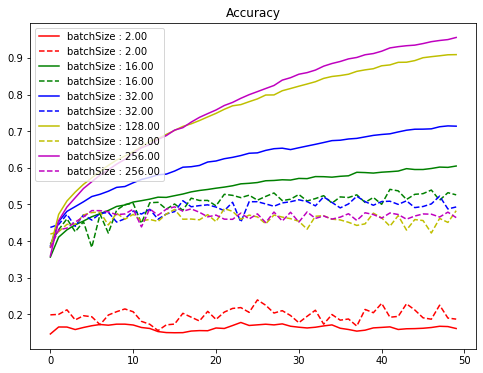

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
#BN 放在 Activation 之前
#=>設定批次為32時,泛化能力最佳,精確率達0.5205

In [30]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
            x = BatchNormalization()(x)
                
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
          
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [32]:
# Define results
results = {}
for batchSize in BATCH_SIZE :
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290

50000/50000 [==============================] - 216s 4ms/step - loss: 2.1998 - accuracy: 0.1876 - val_loss: 220.0228 - val_accuracy: 0.2263
Epoch 47/50
50000/50000 [==============================] - 218s 4ms/step - loss: 2.1959 - accuracy: 0.1893 - val_loss: 96.0827 - val_accuracy: 0.2431
Epoch 48/50
50000/50000 [==============================] - 218s 4ms/step - loss: 2.1888 - accuracy: 0.1925 - val_loss: 57.2874 - val_accuracy: 0.2483
Epoch 49/50
50000/50000 [==============================] - 219s 4ms/step - loss: 2.1851 - accuracy: 0.1958 - val_loss: 53.8139 - val_accuracy: 0.2429
Epoch 50/50
50000/50000 [==============================] - 222s 4ms/step - loss: 2.2033 - accuracy: 0.1885 - val_loss: 80.3039 - val_accuracy: 0.2520
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
______________________________________________

Epoch 42/50
50000/50000 [==============================] - 45s 892us/step - loss: 1.0008 - accuracy: 0.6420 - val_loss: 1.4354 - val_accuracy: 0.5119
Epoch 43/50
50000/50000 [==============================] - 44s 888us/step - loss: 0.9969 - accuracy: 0.6418 - val_loss: 1.4741 - val_accuracy: 0.5104
Epoch 44/50
50000/50000 [==============================] - 44s 888us/step - loss: 0.9889 - accuracy: 0.6438 - val_loss: 1.4797 - val_accuracy: 0.5077
Epoch 45/50
50000/50000 [==============================] - 44s 890us/step - loss: 0.9865 - accuracy: 0.6453 - val_loss: 1.4328 - val_accuracy: 0.5203
Epoch 46/50
50000/50000 [==============================] - 44s 889us/step - loss: 0.9808 - accuracy: 0.6476 - val_loss: 1.4328 - val_accuracy: 0.5198
Epoch 47/50
50000/50000 [==============================] - 44s 887us/step - loss: 0.9713 - accuracy: 0.6499 - val_loss: 1.4748 - val_accuracy: 0.5132
Epoch 48/50
50000/50000 [==============================] - 44s 883us/step - loss: 0.9695 - accuracy:

Epoch 38/50
50000/50000 [==============================] - 26s 525us/step - loss: 0.8006 - accuracy: 0.7127 - val_loss: 1.6827 - val_accuracy: 0.4954
Epoch 39/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.7850 - accuracy: 0.7186 - val_loss: 1.5448 - val_accuracy: 0.5161
Epoch 40/50
50000/50000 [==============================] - 26s 524us/step - loss: 0.7866 - accuracy: 0.7163 - val_loss: 1.6768 - val_accuracy: 0.4884
Epoch 41/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.7744 - accuracy: 0.7229 - val_loss: 1.6475 - val_accuracy: 0.4954
Epoch 42/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.7643 - accuracy: 0.7266 - val_loss: 1.6113 - val_accuracy: 0.5082
Epoch 43/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.7571 - accuracy: 0.7282 - val_loss: 1.5925 - val_accuracy: 0.5163
Epoch 44/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.7488 - accuracy:

50000/50000 [==============================] - 9s 186us/step - loss: 0.5123 - accuracy: 0.8262 - val_loss: 2.0687 - val_accuracy: 0.4659
Epoch 32/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.4959 - accuracy: 0.8296 - val_loss: 1.8758 - val_accuracy: 0.4711
Epoch 33/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.4820 - accuracy: 0.8342 - val_loss: 1.9998 - val_accuracy: 0.4699 - loss: 0.4704 -  - ETA: 1s - loss: 0.4733 - 
Epoch 34/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.4495 - accuracy: 0.8483 - val_loss: 2.1999 - val_accuracy: 0.4508
Epoch 35/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.4319 - accuracy: 0.8541 - val_loss: 2.0637 - val_accuracy: 0.4791
Epoch 36/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.4171 - accuracy: 0.8587 - val_loss: 1.9690 - val_accuracy: 0.4761
Epoch 37/50
50000/50000 [==============================] - 9s 188us/step

50000/50000 [==============================] - 6s 125us/step - loss: 0.6554 - accuracy: 0.7816 - val_loss: 1.6040 - val_accuracy: 0.4871
Epoch 27/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.6278 - accuracy: 0.7940 - val_loss: 1.6099 - val_accuracy: 0.4976
Epoch 28/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.6045 - accuracy: 0.7996 - val_loss: 1.7053 - val_accuracy: 0.4711
Epoch 29/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.5795 - accuracy: 0.8096 - val_loss: 1.6759 - val_accuracy: 0.4918
Epoch 30/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.5500 - accuracy: 0.8235 - val_loss: 1.7119 - val_accuracy: 0.4822
Epoch 31/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.5313 - accuracy: 0.8290 - val_loss: 1.7449 - val_accuracy: 0.4860
Epoch 32/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.5080 - accuracy: 0.8378 - val_loss:

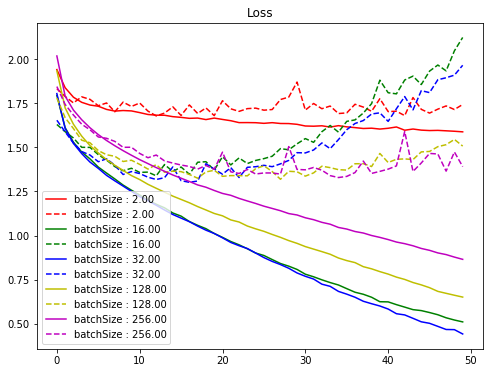

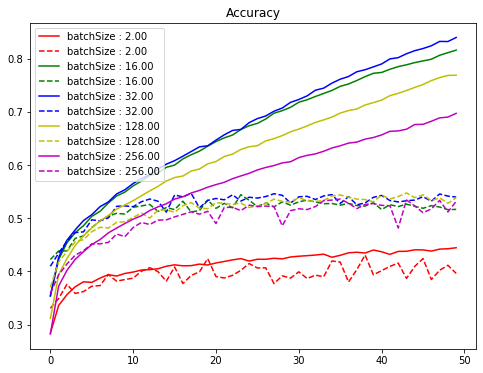

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# BN 放在 Input Layer 後

#=>設定批次為32時,泛化能力最佳,準確率為0.5469


In [33]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
                       
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
                           
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
          
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [34]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [35]:
# Define results
results = {}
for batchSize in BATCH_SIZE :
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 226s 5

Epoch 49/50
50000/50000 [==============================] - 221s 4ms/step - loss: 1.5914 - accuracy: 0.4428 - val_loss: 1.7147 - val_accuracy: 0.4117
Epoch 50/50
50000/50000 [==============================] - 221s 4ms/step - loss: 1.5881 - accuracy: 0.4446 - val_loss: 1.7431 - val_accuracy: 0.3964
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)          

50000/50000 [==============================] - 42s 842us/step - loss: 0.5640 - accuracy: 0.7959 - val_loss: 1.9323 - val_accuracy: 0.5188
Epoch 47/50
50000/50000 [==============================] - 41s 824us/step - loss: 0.5516 - accuracy: 0.7990 - val_loss: 1.9668 - val_accuracy: 0.5238
Epoch 48/50
50000/50000 [==============================] - 42s 834us/step - loss: 0.5343 - accuracy: 0.8065 - val_loss: 1.9336 - val_accuracy: 0.5212
Epoch 49/50
50000/50000 [==============================] - 42s 833us/step - loss: 0.5216 - accuracy: 0.8114 - val_loss: 2.0471 - val_accuracy: 0.5162
Epoch 50/50
50000/50000 [==============================] - 42s 834us/step - loss: 0.5110 - accuracy: 0.8162 - val_loss: 2.1229 - val_accuracy: 0.5168
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
______________________________________________

50000/50000 [==============================] - 24s 489us/step - loss: 0.5505 - accuracy: 0.8020 - val_loss: 1.7881 - val_accuracy: 0.5308
Epoch 44/50
50000/50000 [==============================] - 24s 486us/step - loss: 0.5312 - accuracy: 0.8093 - val_loss: 1.7127 - val_accuracy: 0.5329
Epoch 45/50
50000/50000 [==============================] - 24s 489us/step - loss: 0.5115 - accuracy: 0.8152 - val_loss: 1.8214 - val_accuracy: 0.5343
Epoch 46/50
50000/50000 [==============================] - 24s 487us/step - loss: 0.5030 - accuracy: 0.8192 - val_loss: 1.8104 - val_accuracy: 0.5406
Epoch 47/50
50000/50000 [==============================] - 24s 489us/step - loss: 0.4856 - accuracy: 0.8243 - val_loss: 1.8833 - val_accuracy: 0.5322
Epoch 48/50
50000/50000 [==============================] - 25s 491us/step - loss: 0.4680 - accuracy: 0.8325 - val_loss: 1.8947 - val_accuracy: 0.5457
Epoch 49/50
50000/50000 [==============================] - 25s 491us/step - loss: 0.4671 - accuracy: 0.8323 - va

Epoch 41/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.7819 - accuracy: 0.7222 - val_loss: 1.4144 - val_accuracy: 0.5438
Epoch 42/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.7648 - accuracy: 0.7305 - val_loss: 1.4325 - val_accuracy: 0.5363
Epoch 43/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.7517 - accuracy: 0.7349 - val_loss: 1.4347 - val_accuracy: 0.5408
Epoch 44/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.7341 - accuracy: 0.7402 - val_loss: 1.4308 - val_accuracy: 0.5477
Epoch 45/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.7208 - accuracy: 0.7460 - val_loss: 1.4744 - val_accuracy: 0.5389
Epoch 46/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.7049 - accuracy: 0.7517 - val_loss: 1.4770 - val_accuracy: 0.5441
Epoch 47/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.6840 - accuracy: 0.7588

Epoch 39/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.0006 - accuracy: 0.6488 - val_loss: 1.3525 - val_accuracy: 0.5260
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.9899 - accuracy: 0.6519 - val_loss: 1.3640 - val_accuracy: 0.5277
Epoch 41/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.9776 - accuracy: 0.6568 - val_loss: 1.3767 - val_accuracy: 0.5243
Epoch 42/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.9635 - accuracy: 0.6635 - val_loss: 1.3951 - val_accuracy: 0.5236
Epoch 43/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.9543 - accuracy: 0.6643 - val_loss: 1.5903 - val_accuracy: 0.4817
Epoch 44/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9424 - accuracy: 0.6675 - val_loss: 1.3637 - val_accuracy: 0.5344
Epoch 45/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9272 - accuracy: 0.6763

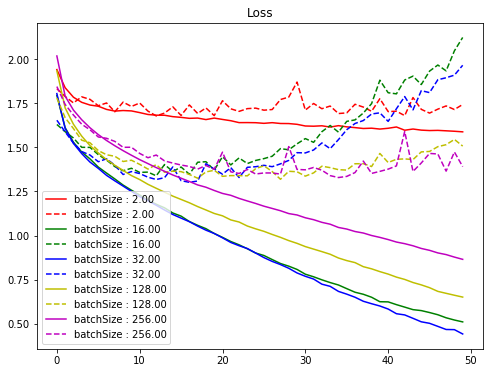

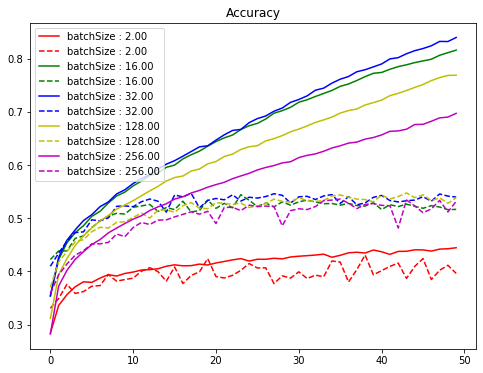

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
#小結：

#Batch_size = 在 16時,泛化能力最佳,精確率達0.5413
#BN 放在 Activation 之前=>設定批次為32時,泛化能力最佳,精確率達0.5205
# BN 放在 Input Layer 後 =>設定批次為32時,泛化能力最佳,準確率為0.5469